# 决策树的sklearn调用

In [3]:
# 导入必要的库
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [4]:
# 加载数据集
data = fetch_openml(name='adult', version=2, as_frame=True)
X = data.data
y = data.target

In [5]:
# 原始数据集
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


In [6]:
# 原始标签集
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: class, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [7]:
# 数据预处理：对分类变量进行编码
label_encoders = {}
for column in X.select_dtypes(include=['category']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])
    
# 数据预处理：对标签进行编码
label_encoders_y = LabelEncoder()
y = label_encoders_y.fit_transform(y)

C:\Users\hjhzjbs\AppData\Local\Temp\ipykernel_24352\2888868506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\hjhzjbs\AppData\Local\Temp\ipykernel_24352\2888868506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\hjhzjbs\AppData\Local\Temp\ipykernel_24352\2888868506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [8]:
# 查看数据集的前几行
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,38


In [9]:
# 检查标签集
print(y)

[0 0 1 ... 0 0 1]


In [10]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 创建决策树模型
clf = DecisionTreeClassifier(max_depth=10,random_state=42) # max_depth控制树的深度，便于后续可视化

In [12]:
# 训练模型
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [13]:
# 预测测试集
y_pred = clf.predict(X_test)

In [14]:
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


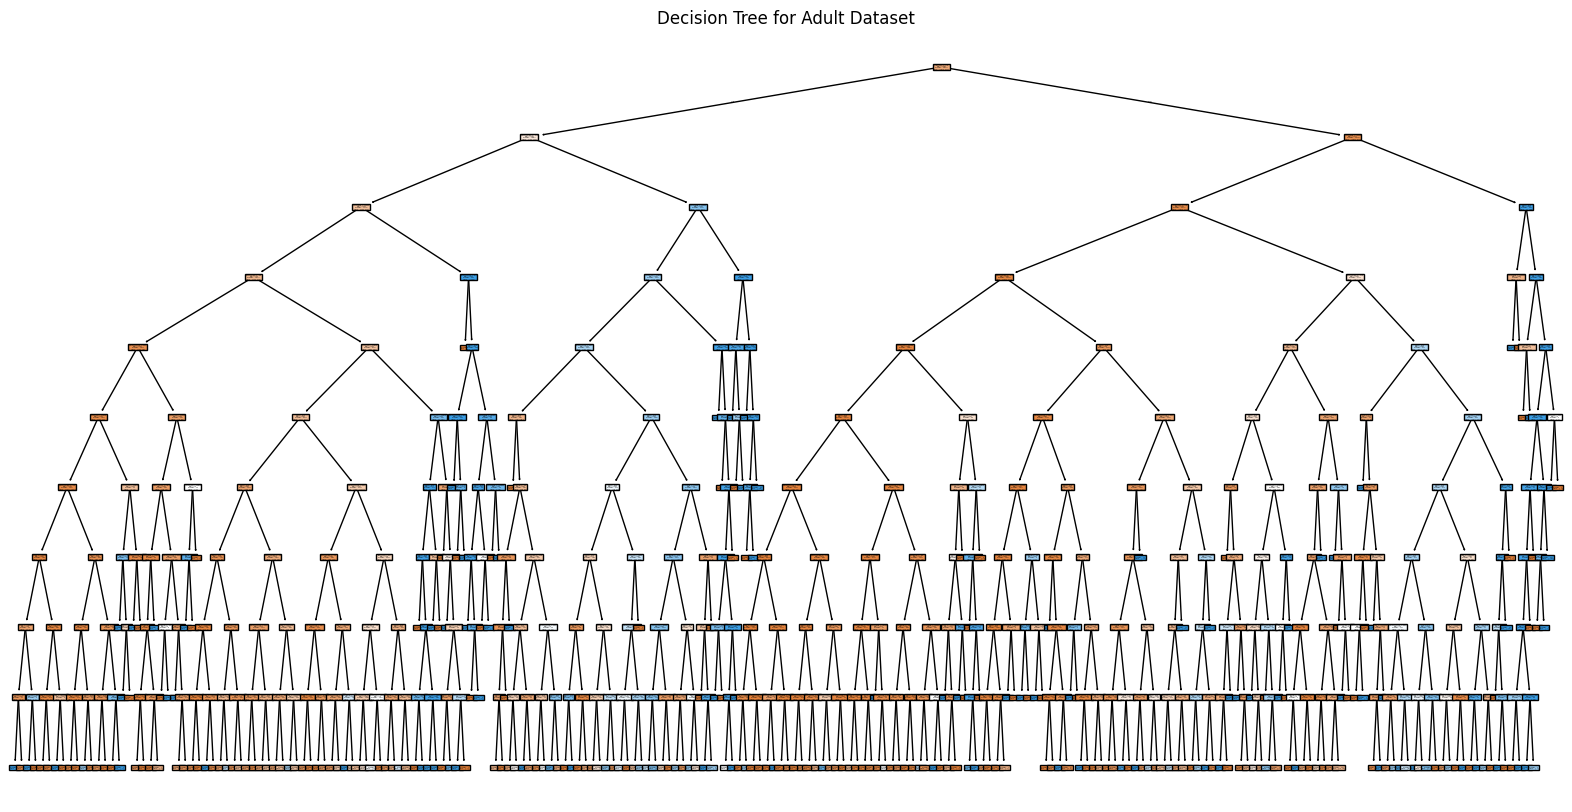

In [15]:
# 结果可视化
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=data.feature_names) # 受max_depth控制，深度为10，若不控制max_depth，绘制时间需要更长
plt.title('Decision Tree for Adult Dataset')
plt.show()